# Homework 9: Cooling of a Lava Dike

### Cee Gould

This homework set is very much based on this week’s computer
lab. We study the cooling of lava filled dike and derive the
temperature distributions T(x,t). The lava has an initial
temperature of 1250°C, and surrounding host rock host rock has
one of 0°C. We assume the dike has a width of d=5 meters and
is infinitely long in y and z directions. For rock and lava, use
a heat capacity of 1.2 Joule/gramm/Kelvin,
a density of 2.75 gramm/cm3,
and a heat conductance of 0.025 J/cm/seconds/Kelvin.
Discretize the dike into N=50 intervals. Then add a layer of host
rock of width 2×d on each side, which brings the total number of intervals to 5×N. This
determines your initial conditions. Choose Dirichlet boundary conditions, T=0, on each side.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib osx

hour = 60*60 #seconds
day =  60*60*24
week =  3600*24*7
month = 60*60*24*30
year = 60*60*24*3665

cp = 1.2 #Joule/gramm/Kelvin
rho = 2.75 #gramm/cm3
kappa = 0.025 #J/cm/s/K

In [101]:
print(kappa/cp*rho)

0.05729166666666667


### Q: Main question of this problem: What is the temperature in the middle of the dike after (a) 1 hour, (b) one day, (c) one week, (d) one month, and (e) after one year?

(1) Write a Python code that solves the 1D heat equation in real time using the following
scheme:

T(x, t + Δt) = (Δt / Δx^2)  * (k / cρ)  * [T(x + Δx, t) − 2T(x, t) + T(x − Δx, t)] + T(x, t)

In [67]:
#Solve (using GS method)

def heatequation(time, r, total):
    for n in range(int(time)):

        for i in range(1,total-1):
            T[i] = r*(T[i-1]+T[i+1]-2*T[i]) + T[i]
    return(T)

Tmax =  1250.0 degrees C   for t = 3600 seconds


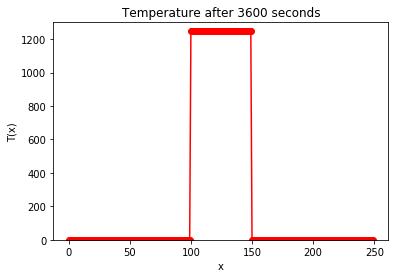

Tmax =  1249.9998737341632 degrees C   for t = 86400 seconds


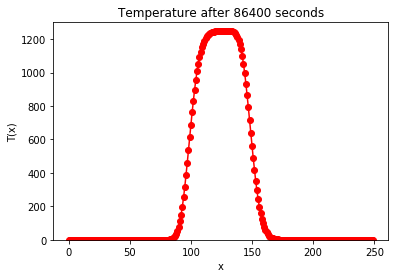

Tmax =  1159.0530927098896 degrees C   for t = 604800 seconds


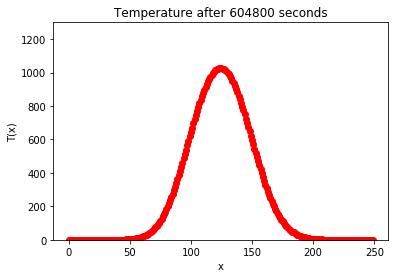

Tmax =  713.7548596704376 degrees C   for t = 2592000 seconds


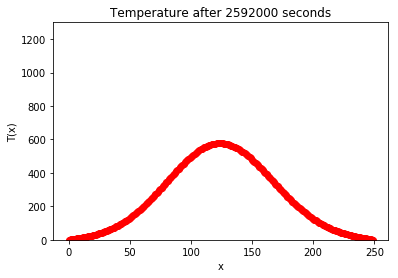

Tmax =  0.7452466027157965 degrees C   for t = 316656000 seconds


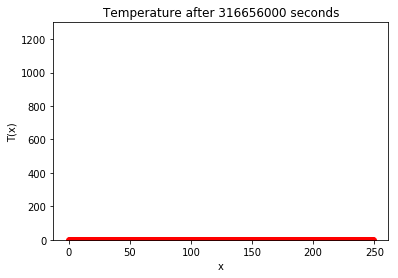

In [3]:
#Define characteristics of the problem
N = 50  #number of cells in the dike
r = 0.4 #choose r
dx = 500/N
dt = r/(kappa/(cp*rho*dx**2)) #find dt for that value of R
host = 2*N #width of rock on either side of the dike, in cells 

#Set up initial condition
total = host*2 + N

x = np.arange(0,total)
T = np.zeros(total)
T[int(total//2-N//2):int(total//2+N//2)] = 1250 #degrees C


time = [hour,day, week, month, year]
for t in time:
    print('Tmax = ', np.max(heatequation(t/dt)), 'degrees C ',' for t =', t, 'seconds')
    heatequation(t/dt)

    plt.subplot
    plt.clf()
    plt.plot(x,T,'ro-')
    plt.title('Temperature after %s' %t + ' seconds')
    plt.xlabel('x')
    plt.ylabel('T(x)')
    plt.ylim(0,1300)
    plt.draw()
    plt.pause(.05)
    plt.show()

In [100]:
print(dx)
print(dt)

10.0
5280.0


(2) Increase the spatial resolution to N=100, 200, 300… points in the dike until all answers to Q
change by less than 1.5°C. When you change N, please adjust Δt so that η remains constant.

In [80]:
Nvalues = [50, 100, 200, 300, 400]
Q_list = []

for N in Nvalues:
    r = 0.4 
    dx = 500/N
    dt = r/(kappa/(cp*rho*dx**2)) 
    host = 2*N 


    total = host*2 + N

    x = np.arange(0,total)
    T = np.zeros(total)
    T[int(total//2-N//2):int(total//2+N//2)] = 1250 #degrees C

    time = [week]
    #time = [hour,day, week]#, month, year]
    for t in range(len(time)):
        Q = np.max(heatequation(time[t]/dt, r, total))
        Q_list.append(Q)
        
        print('N = ', N,' Tmax = ', Q , 'degrees C ',' for t =', time[t], 'seconds')
        
for q in range(len(Q_list)):
    if q > 0:
        if Q_list[q] - Q_list[q-1] < 1.5:
            converge = Nvalues[q]
            print('Convergest at N =', converge)
            break

N =  50  Tmax =  1197.31384983313 degrees C   for t = 604800 seconds
N =  100  Tmax =  1196.3383504931255 degrees C   for t = 604800 seconds
N =  200  Tmax =  1196.2359447541946 degrees C   for t = 604800 seconds
N =  300  Tmax =  1196.1853603060943 degrees C   for t = 604800 seconds
N =  400  Tmax =  1196.1747656500288 degrees C   for t = 604800 seconds
Convergest at N = 100


In [82]:
N = converge
r = 0.4 
dx = 500/N
dt = r/(kappa/(cp*rho*dx**2)) 
host = 2*N 


total = host*2 + N

x = np.arange(0,total)
T = np.zeros(total)
T[int(total//2-N//2):int(total//2+N//2)] = 1250 #degrees C


time = [hour,day, week, month, year]
for t in range(len(time)):
    Q = np.max(heatequation(time[t]/dt, r, total))
        
    print('N = ', N,' Tmax = ', Q , 'degrees C ',' for t =', time[t], 'seconds')

N =  100  Tmax =  1250.0 degrees C   for t = 3600 seconds
N =  100  Tmax =  1249.9998116964352 degrees C   for t = 86400 seconds
N =  100  Tmax =  1176.6597827746693 degrees C   for t = 604800 seconds
N =  100  Tmax =  768.4116697756211 degrees C   for t = 2592000 seconds
N =  100  Tmax =  0.8148998381513364 degrees C   for t = 316656000 seconds


(3) Using again N=50, increase the width of the host rock layers from 2×d to 4×d, 6×d, 8×d, …
until the results for Q are converged to a precision of 1.5°C.

In [98]:
host_values = [2*N, 4*N, 6*N, 8*N] 
Q_list = []


time = [week]

N = 50  
r = 0.4 
dx = 500/N
dt = r/(kappa/(cp*rho*dx**2)) 


for host in host_values:

    
    total = host*2 + N

    x = np.arange(0,total)
    T = np.zeros(total)
    T[int(total//2-N//2):int(total//2+N//2)] = 1250 #degrees C



    for t in range(len(time)):
        Q = np.max(heatequation(time[t]/dt, r, total)) 
        Q_list.append(Q)
        
        print('host= ', host/N,'* N, ', 'Tmax = ', Q , 'degrees C ',' for t =', time[t], 'seconds')
        
for q in range(len(Q_list)):
    if q > 0:
        if Q_list[q] - Q_list[q-1] < 1.5:
            converge = host_values[q]//N
            print('Convergest at host =', converge, '* N')
            break

host=  2.0 * N,  Tmax =  1197.31384983313 degrees C   for t = 604800 seconds
host=  4.0 * N,  Tmax =  1197.31384983313 degrees C   for t = 604800 seconds
host=  6.0 * N,  Tmax =  1197.31384983313 degrees C   for t = 604800 seconds
host=  8.0 * N,  Tmax =  1197.31384983313 degrees C   for t = 604800 seconds
Convergest at host = 4 * N


In [99]:
N = 50
r = 0.4 
dx = 500/N
dt = r/(kappa/(cp*rho*dx**2)) 

host = converge * N

total = host*2 + N

x = np.arange(0,total)
T = np.zeros(total)
T[int(total//2-N//2):int(total//2+N//2)] = 1250 #degrees C


time = [hour,day, week, month, year]
for t in range(len(time)):
    Q = np.max(heatequation(time[t]/dt, r, total))
        
    print('host= ', converge,'* N, ', 'Tmax = ', Q , 'degrees C ',' for t =', time[t], 'seconds')

450
host=  4 * N,  Tmax =  1250.0 degrees C   for t = 3600 seconds
host=  4 * N,  Tmax =  1249.9998737341632 degrees C   for t = 86400 seconds
host=  4 * N,  Tmax =  1178.5755554749055 degrees C   for t = 604800 seconds
host=  4 * N,  Tmax =  769.604812622944 degrees C   for t = 2592000 seconds
host=  4 * N,  Tmax =  38.33551173577725 degrees C   for t = 316656000 seconds


(4) Finally compute how much heat the lava loses as function of time. The thermal energy is
proportional to area under the T(x,t) curve. Integrate the area inside the dike region and report
what fraction is heat is lost for the time spans a)-e) by adding another column to the table in part
(3).

In [62]:
from scipy import integrate


N = 50  
r = 0.4 
dx = 500/N
dt = r/(kappa/(cp*rho*dx**2)) 
host = 2*N 


total = host*2 + N

x = np.arange(0,total)
T = np.zeros(total)
T[int(total//2-N//2):int(total//2+N//2)] = 1250 #degrees C


time = [0, hour,day, week, month, year]

for t in range(len(time)):

    if t ==0:
        initial_energy = integrate.simps(heatequation(time[t]/dt))
    
    energy = integrate.simps(heatequation(time[t]/dt))
        
    fraction = energy/initial_energy
    
    print(fraction*100, 'percent of energy remains after', 't =', time[t], 'seconds')

100.0 percent of energy remains after t = 0 seconds
100.0 percent of energy remains after t = 3600 seconds
100.0 percent of energy remains after t = 86400 seconds
99.99999999954649 percent of energy remains after t = 604800 seconds
99.98268475383122 percent of energy remains after t = 2592000 seconds
0.20187078373532724 percent of energy remains after t = 316656000 seconds
